# Pandas (Day 4)

In [28]:
import pandas as pd

## Question 1

In [25]:
ECSP = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv')

In [26]:
ECSP['Company Name'].nunique()

787

## Question 2

In [27]:
ECSP[ECSP['City'] == 'Queens']['Job created'].sum()

12257.0

## Question 3

In [16]:
ECSP['company email'].count() == len(ECSP)

False

In [17]:
ECSP['company email update'] = ECSP['company email'].fillna('EMPTY')

In [18]:
def get_e_domain(email):
    if email == 'EMPTY':
        return ''
    elif len(email.split('@')) == 1:
        #print(email)
        return ''
    else:
        return email.split('@')[1].split('.')[0]

In [20]:
ECSP['company email update'].apply(get_e_domain).nunique()

584

## Question 4

In [100]:
count_bsn = ECSP.groupby('Neighborhood Tabulation Area (NTA) (2020)').count()
NTA_sr = count_bsn[count_bsn['Company Name'] >= 5]['Company Name']

In [101]:
NTA_df1 = pd.DataFrame(NTA_sr)

In [102]:
NTA_sr2 = ECSP.groupby('Neighborhood Tabulation Area (NTA) (2020)').mean() \
        ['Total Savings']
NTA_df2 = pd.DataFrame(NTA_sr2)

C:\Users\16143\AppData\Local\Temp\ipykernel_24864\1713535155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NTA_sr2 = ECSP.groupby('Neighborhood Tabulation Area (NTA) (2020)').mean() \


In [103]:
NTA_sr3 = ECSP.groupby('Neighborhood Tabulation Area (NTA) (2020)').sum() \
        ['Job created']
NTA_df3 = pd.DataFrame(NTA_sr3)

C:\Users\16143\AppData\Local\Temp\ipykernel_24864\1041727620.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NTA_sr3 = ECSP.groupby('Neighborhood Tabulation Area (NTA) (2020)').sum() \


In [109]:
NTA_df = NTA_df1.join(NTA_df2).join(NTA_df3)
NTA_df

,Company Name,Total Savings,Job created
Neighborhood Tabulation Area (NTA) (2020),,,
BK0101,78,10367.961795,16.0
BK0102,9,12599.753333,15.0
BK0103,7,19150.922857,0.0
BK0104,104,21158.253077,187.0
BK0201,11,15102.036364,0.0
...,...,...,...
QN1305,5,166379.352000,0.0
QN1306,25,21160.505200,0.0
SI0106,7,6338.252857,10.0


## Question 5

In [111]:
NTA_df.to_csv('NTA_TotalSavingsJobs',index=False)

# Plot (Day 5)

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 Scatter Plot

In [120]:
NTA_df = pd.read_csv('NTA_TotalSavingsJobs')
NTA_df

,Company Name,Total Savings,Job created
0,78,10367.961795,16.0
1,9,12599.753333,15.0
2,7,19150.922857,0.0
3,104,21158.253077,187.0
4,11,15102.036364,0.0
...,...,...,...
67,5,166379.352000,0.0
68,25,21160.505200,0.0
69,7,6338.252857,10.0
70,15,113610.160000,300.0


Text(0, 0.5, 'Average savings (log)')

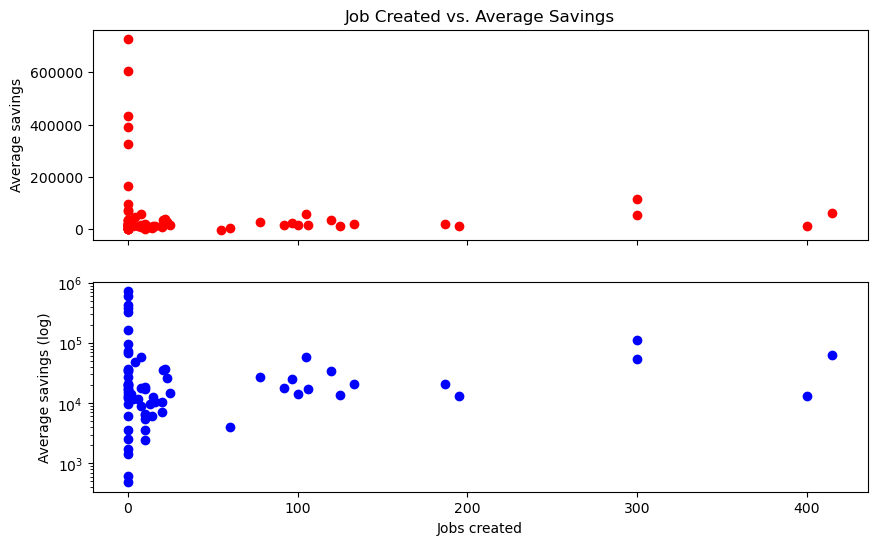

In [169]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (10,6), sharex=True)

ax1.scatter(NTA_df['Job created'], NTA_df['Total Savings'], c = 'r')
ax1.set_title('Job Created vs. Average Savings')
ax1.set_ylabel('Average savings')

ax2.set_yscale('log')
ax2.scatter(NTA_df['Job created'], NTA_df['Total Savings'], c = 'b')
ax2.set_xlabel('Jobs created')
ax2.set_ylabel('Average savings (log)')

## Q2 Histogram

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='Total Savings', ylabel='Count'>

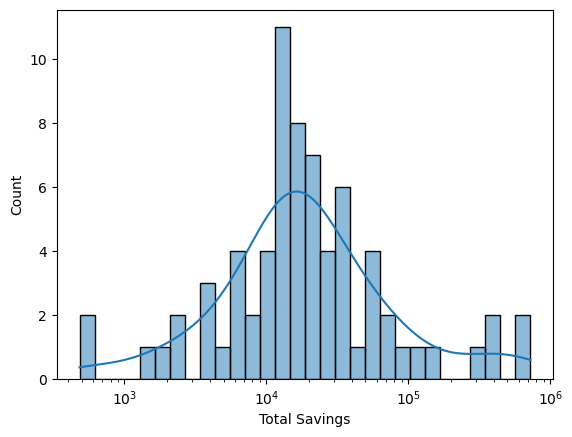

In [206]:
sns.histplot(x = 'Total Savings', data = NTA_df, bins = 30, log_scale= True, kde = True)

In [220]:
ECSP['Effective Date'] = pd.to_datetime(ECSP['Effective Date'])

In [230]:
ECSP['Month'] = ECSP['Effective Date'].apply(lambda time: time.month)

In [242]:
total_job_by_month = ECSP.groupby('Month').sum()['Job created'] 

C:\Users\16143\AppData\Local\Temp\ipykernel_24864\2154222711.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_job_by_month = ECSP.groupby('Month').sum()['Job created']


Text(0, 0.5, 'Total jobs')

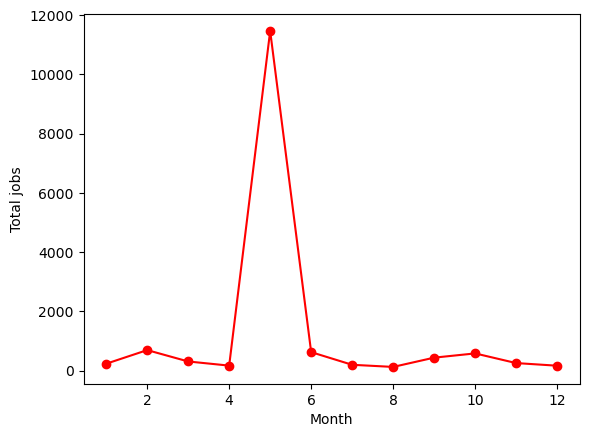

In [258]:
plt.plot(total_job_by_month, c='r', marker = 'o')
plt.xlabel('Month')
plt.ylabel('Total jobs')